In [ ]:
#7-1 인공 신경망
#패션 MNIST
#패선 MNIST 데이터셋 사용
#이 데이터셋은 10종류의 패션 아이템으로 구성되어 있음
#턴세플로 사용
from tensorflow import keras
(train_input, train_target), (test_input, test_target)= keras.datasets.fashion_mnist.load_data()
#keras.datasets.fashion_mnist 모듈 아래 load_data() 함수는 친절하게 훈련 데이터와
#테스트 데이터를 나누어 반환한다. 이 데이터는 각각 입력과 타깃의 쌍으로 구성되어 있다.

#내려받는 데이터가 있는지 확인할려면 왼쪽의 sample_data 폴더를 확인해보면 된다.

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


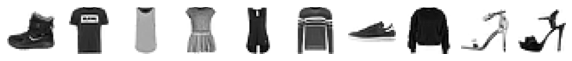

In [ ]:
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])
'''
패션 MNIST 타깃은 0~9 까지의 숫자 레이블로 구성된다.
각 숫자의 의미는 아직 모르지만 마지막 2개의 샘플이 같은 레이블(숫자 5)을 가지고 있다.
위의 출력한 이미지를 보더라도 2개의 샘플은 같은 종류의 신발 이다.
'''

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


'\n패션 MNIST 타깃은 0~9 까지의 숫자 레이블로 구성된다.\n각 숫자의 의미는 아직 모르지만 마지막 2개의 샘플이 같은 레이블(숫자 5)을 가지고 있다.\n위의 출력한 이미지를 보더라도 2개의 샘플은 같은 종류의 신발 이다.\n'

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
#로지스틱 회귀로 패션 아이템 분류하기
'''
MNist의 경우 픽셀은 0~255 사이의 정숫값을 가진다.
이런 이미지의 경우 보통 255로 나누어 0~1사이의 값으로 정규화한다.
SGDClassifier은 2차원 입력을 다루지 못하기 때무네 각 샘플을 1차원 배열로 만들어야 한다.
'''
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)
print(train_scaled.shape)
'''
reshape() 메서드의 두 번째 매개변수를 28*28 이미지 크기에 맞게 지정하면 첫 번째 차원(샘플 개수)은 변하지 않고 원본 데이터의
두 번째, 세 번째 차원이 1차원으로 합쳐진다.

기대한 대로 784개의 픽셀로 이루어진 60,000개의 샘플이 준비되었다.
이 데이터에서 교차검증으로 성능을 확인하자
'''

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log', max_iter=5, random_state=42)
scores=cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
'''
sc=SGDClassifier(loss='log', max_iter=9, random_state=42)
scores=cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

sc=SGDClassifier(loss='log', max_iter=20, random_state=42)
scores=cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
'''
'''

여기에서는 SGClassifier의 반복횟수를 5번으로 지정.
아무리 늘려도 성능이 크게 향상되지는 않는다.
'''

(60000, 784)
0.8195666666666668


'\n\n여기에서는 SGClassifier의 반복횟수를 5번으로 지정.\n아무리 늘려도 성능이 크게 향상되지는 않는다.\n'

In [ ]:
#인공 신경망
#가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다.
#인공 신경망은 기존의 머신러닝 알고리즘이 잘 해결하지 못했던 문제에서 높은 성능을 발휘하는 새로운 종류의 머신러닝 알고리즘일 뿐이다.

In [ ]:
#텐서플로와 케라스
import tensorflow as tf
#텐서플로에는 저수준 API와 고수준 API가 있다. 케라스가 텐서플로의 고수준 API이다.
#딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다는 것이다.
#GPU는 벡터와 행렬 연산에 매우 최적화 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 된다.
#케라스 라이브러리는 직접 CPU 연산을 수행하지 않는다. 대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용한다.
#예를 들면 텐서플로가 케라스의 백엔드 중 하나이다. 이외에도 씨아노, CNTK와 같은 여러 딥러닝 라이브러리를 케라스 백엔드로 사용할 수 있다.
#이런 케라스를 멀티-백엔드 케라스라고 부른다.
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
#로지스틱 회귀에서는 교차검증을 통해 모델을 평가했지만, 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
#이유는 딥러닝 분야의 데이터셋은 충분히 크게 때문에 검증 점수가 안정적이고, 교차검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문이다.

#훈련 세트에서 20%를 검증 세트로 덜어 내었다. 훈련 세트와 검증 세트의 크기를 알아보자.
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
#60,000개 중에 12,000개가 검증 세트로 분리되었다,


(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
dense=keras.layers.Dense(10,activation='softmax', input_shape=(784,))
'''
첫 번째 매개변수로 뉴런 개수를 10개로 지정. 10개의 패션 아이템을 분류하기 때문에
10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해서는 소프트맥스 함수를 사용한다.
케라스 층에서는 activation 매개변수에 이 함수를 지정. 만약 2개의 클래스를 분류하는 이진 분류라면 시그모이드 함수를 사용하기 위해
activation='sigmoid' 와 같이 설정
마지막 세 번째 매개변수는 입력값의 크기이다. 10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정.
'''
model=keras.Sequential(dense)
#여기서 만든 model 객체가 바로 신경망 모델이다.
#소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수라고 한다.

In [ ]:
#인공 신경망으로 패션 아이템 분류하기
#지금까지 사용했던 사이킷런에 비해 케라스에서 모델을 만드는 방식은 조금 다르다.
#케라스 모델은 훈련하지 전에 설저어 단계가 있다.
#이런 설정을 model 객체의 compile() 메서드에서 수행한다. 꼭 지정해야 할 것은 손실 함수의 종류이다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
'''
이진 분류에서 이진 크로스 엔트로피 손실 함수를 사용한다.
다중 분류에서는 크로스 엔트로피 손실 함수를 사용한다. 케라스에서는 이 두 손시 함수를 각각 binary_crossentropy, categorial_crossentropy 로 나누어 부른다.
'''
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6072 - accuracy: 0.7958
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4788 - accuracy: 0.8411
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4566 - accuracy: 0.8479
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4446 - accuracy: 0.8520
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8557


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4494 - accuracy: 0.8468


[0.44936996698379517, 0.846833348274231]

In [ ]:
#7-2 심층 신경망
#2개의 층
from tensorflow import keras
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()

#그다음 이미지의 픽셀값을 0~255 범위에서 0~1 사이로 변환하고, 28*28 크기의 2차원 배열을
#784 크기의 1차원 배열을 펼친다.

from sklearn.model_selection import train_test_split
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [ ]:
#신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가 된 것이다.
#이렇게 입력층과 출력층 사이에 있는 모든 층을 은닉층이다.
#활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수이다.
#출려층에 적용했던 소프트맥스 함수도 활성화 함수이다.
#출력층에 적용하는 활성화 함수는 종류가 제한되어 있다. 이진 분류일 경우 시그모이드 함수를 사용하고 다중 분류일 경우 소프트맥스를 사용한다.
#이에 비해 은닉층의 활성화 함수는 비교적 자유롭다.
#대표적으로 시그모이드 함수와 렐루 함수 등을 사용한다.
'''
은닉층에 왜 활성화 함수를 적용할까?

인공 신경망을 그림으로 나타날 때 활성화 함수를 생략하는 경우가 많은데 이는 절편과 마찬가지로
번거룸을 피하기 위해 서 활성화 함수를 별개의 층으로 생각하지 않고 층에 포함되어 있다고 간주하기 때문이다.
'''

#시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들자.
#케라스에서 신경망의 첫 번째 층은 input_shape 매개변수로 입력의 크기를 꼭 지정해 주어야 한다.

dense1=keras.layers.Dense(100, activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10,activation='softmax')
#dense1이 은닉층이고 100개의 뉴런을 가진 밀집층이다.
#활성화 함수를 'sigmoid'로 지정했고 input_shape 매개변수에서 입력의 크기를 (784,)로 지정
#은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없다, 몇 개의 뉴런을 두어야 할지 판단하기 위해서는 상당한 경험이 필요하다
#적어도 출력층의 뉴런보다는 많게 만들어야 한다. 클래스 10개에 대한 확률을 예측해야 하는데 이전 은닉층의 뉴런이 10개보다 저가며녀 부족한 정보가 전달 될 것이다.
#dense2는 출력층이다. 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정했다.

In [ ]:
#심층 신경망 만들기
#앞에서 만든 dense1과 dense2 객체를 Sequential 클래스에 추가하여 심층 신경망을 만들어 보자.

model=keras.Sequential([dense1, dense2])
#Sequential 클래스의 객체를 만들 때 여려 개의 층을 추가하려면 이와 같이 dense1과 dense2를 리스트로 만들어 전달
#여기서 주의할 것은 가장 마지막에 두어야 한다는 것이다.
#이 리스트는 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열해야 한다.
#인공 신경망의 강력한 성능은 바로 이렇게 층을 추가하여 입력 데이터에 대해 연속적은 학습을 진행하는 능력에서 나온다.
model.summary()

'''
맨 첫줄에 모델의 이름이 나온다.
그 다음 이 모델에 들어 있는 층이 순서대로 나열된다.
층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수 출력
층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙인다.

출력 크기를 보면 (None, 100)이다.
첫 번째 차원은 샘플의 개수를 나타낸다.
샘플 개수가 아직 정의되어 있지 않기 때문에 None이다.
케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다.
미니배치 경사 하강법을 사용한다.
'''

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


"\n맨 첫줄에 모델의 이름이 나온다.\n그 다음 이 모델에 들어 있는 층이 순서대로 나열된다.\n층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수 출력\n층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙인다.\n\n출력 크기를 보면 (None, 100)이다.\n첫 번째 차원은 샘플의 개수를 나타낸다.\n샘플 개수가 아직 정의되어 있지 않기 때문에 None이다.\n케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다.\n미니배치 경사 하강법을 사용한다.\n"

In [ ]:
model=keras.Sequential([keras.layers.Dense(100,activation='sigmoid', input_shape=(784,), name='hidden'), keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model=keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5636 - accuracy: 0.8077
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4057 - accuracy: 0.8527
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3718 - accuracy: 0.8633
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3495 - accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3331 - accuracy: 0.8792


In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.8140
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3966 - accuracy: 0.8577
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8707
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3375 - accuracy: 0.8795
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8879


In [ ]:
model.compile(optimizer='adam', loss='sparse_caeegorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3913 - accuracy: 0.8702


[0.3912712335586548, 0.8701666593551636]

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28*28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))



TypeError: ignored

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model
model=model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


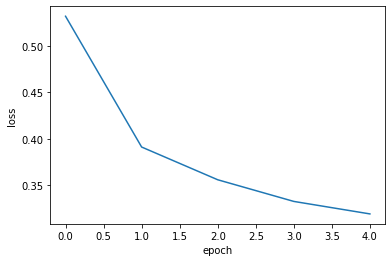

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

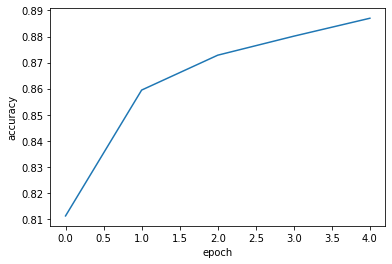

In [10]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

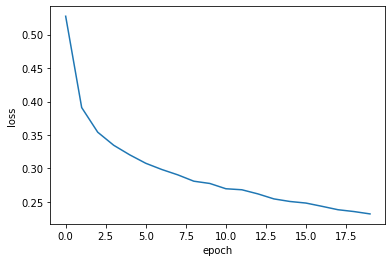

In [12]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


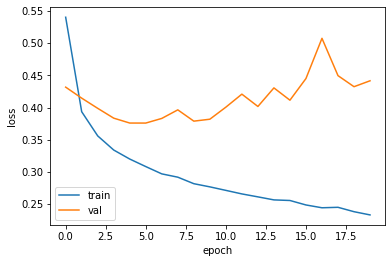

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

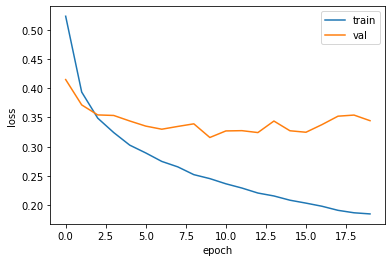

In [16]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [17]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


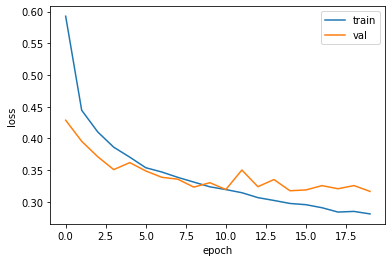

In [21]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [23]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [30]:
model.save_weights('model-weights.h5')

In [31]:
model.save('model-whole.h5')

In [32]:
!ls -al *.h5

-rw-r--r-- 1 root root 981736 Aug 13 10:21 model-weight.h5
-rw-r--r-- 1 root root 332480 Aug 13 10:21 model-weights.h5
-rw-r--r-- 1 root root 981736 Aug 13 10:21 model-whole.h5


In [34]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [36]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

0.8816666666666667


In [37]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8817


[0.3275960683822632, 0.8816666603088379]

In [38]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
cehckpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[cehckpoint_cb])

model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3273 - accuracy: 0.8849


[0.32727280259132385, 0.8849166631698608]

In [42]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
cehckpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[cehckpoint_cb, early_stopping_cb])

In [43]:
print(early_stopping_cb.stopped_epoch)

17


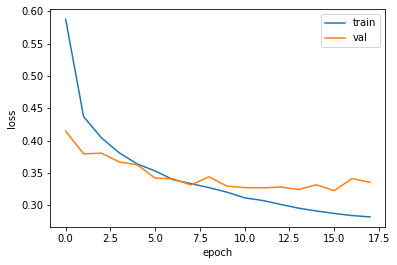

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [45]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8857


[0.3227355182170868, 0.8856666684150696]